# Introduction
Chess, a timeless board game, holds a special place in the hearts of many. Personally, I engage in a game of chess every day. Online chess has enjoyed popularity for decades, but it also brings challenges. With the fusion of advanced algorithms surpassing human capabilities and the anonymity provided by computer screens, online platforms often struggle with cheaters. While platforms like chess.com employ effective move analysis to detect cheaters, some still slip through, especially those who cheat selectively. This analysis delves into the application of unsupervised learning to identify potential cheaters on the widely-used chess website, lichess.org.

# Exploratory Data Analysis

### Importing Required Libraries

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Loading Data

In [2]:
data = pd.read_csv('chess_data/games.csv')

### Dataset Information and Preview
As we can see, there are just over 20,000 games in this database. They are stored as a CSV with various metadata about the games in each row. Fortunately, there are no null values.

In [3]:
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20058 entries, 0 to 20057
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              20058 non-null  object 
 1   rated           20058 non-null  bool   
 2   created_at      20058 non-null  float64
 3   last_move_at    20058 non-null  float64
 4   turns           20058 non-null  int64  
 5   victory_status  20058 non-null  object 
 6   winner          20058 non-null  object 
 7   increment_code  20058 non-null  object 
 8   white_id        20058 non-null  object 
 9   white_rating    20058 non-null  int64  
 10  black_id        20058 non-null  object 
 11  black_rating    20058 non-null  int64  
 12  moves           20058 non-null  object 
 13  opening_eco     20058 non-null  object 
 14  opening_name    20058 non-null  object 
 15  opening_ply     20058 non-null  int64  
dtypes: bool(1), float64(2), int64(4), object(9)
memory usage: 2.3+ MB


,id,rated,created_at,last_move_at,turns,victory_status,winner,increment_code,white_id,white_rating,black_id,black_rating,moves,opening_eco,opening_name,opening_ply
0,TZJHLljE,False,1.504210e+12,1.504210e+12,13,outoftime,white,15+2,bourgris,1500,a-00,1191,d4 d5 c4 c6 cxd5 e6 dxe6 fxe6 Nf3 Bb4+ Nc3 Ba5...,D10,Slav Defense: Exchange Variation,5
1,l1NXvwaE,True,1.504130e+12,1.504130e+12,16,resign,black,5+10,a-00,1322,skinnerua,1261,d4 Nc6 e4 e5 f4 f6 dxe5 fxe5 fxe5 Nxe5 Qd4 Nc6...,B00,Nimzowitsch Defense: Kennedy Variation,4
2,mIICvQHh,True,1.504130e+12,1.504130e+12,61,mate,white,5+10,ischia,1496,a-00,1500,e4 e5 d3 d6 Be3 c6 Be2 b5 Nd2 a5 a4 c5 axb5 Nc...,C20,King's Pawn Game: Leonardis Variation,3
3,kWKvrqYL,True,1.504110e+12,1.504110e+12,61,mate,white,20+0,daniamurashov,1439,adivanov2009,1454,d4 d5 Nf3 Bf5 Nc3 Nf6 Bf4 Ng4 e3 Nc6 Be2 Qd7 O...,D02,Queen's Pawn Game: Zukertort Variation,3
4,9tXo1AUZ,True,1.504030e+12,1.504030e+12,95,mate,white,30+3,nik221107,1523,adivanov2009,1469,e4 e5 Nf3 d6 d4 Nc6 d5 Nb4 a3 Na6 Nc3 Be7 b4 N...,C41,Philidor Defense,5


In [5]:
data.describe()

,created_at,last_move_at,turns,white_rating,black_rating,opening_ply
count,2.005800e+04,2.005800e+04,20058.000000,20058.000000,20058.000000,20058.000000
mean,1.483617e+12,1.483618e+12,60.465999,1596.631868,1588.831987,4.816981
std,2.850151e+10,2.850140e+10,33.570585,291.253376,291.036126,2.797152
min,1.376772e+12,1.376772e+12,1.000000,784.000000,789.000000,1.000000
25%,1.477548e+12,1.477548e+12,37.000000,1398.000000,1391.000000,3.000000
50%,1.496010e+12,1.496010e+12,55.000000,1567.000000,1562.000000,4.000000
75%,1.503170e+12,1.503170e+12,79.000000,1793.000000,1784.000000,6.000000
max,1.504493e+12,1.504494e+12,349.000000,2700.000000,2723.000000,28.000000


### Distribution of Number of Turns
This section visualizes the distribution of the number of turns in chess games. It utilizes a histogram with a kernel density estimate (KDE) overlay to provide insights into the frequency of different turn counts.

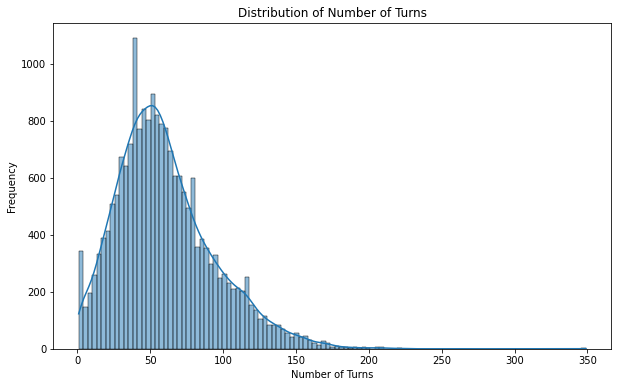

In [8]:
plt.figure(figsize=(10, 6))
sns.histplot(data['turns'], kde=True)
plt.title('Distribution of Number of Turns')
plt.xlabel('Number of Turns')
plt.ylabel('Frequency')
plt.show()

### Correlation Matrix
This section computes the correlation matrix between selected features of the dataset, namely 'turns', 'white_rating', 'black_rating', and 'opening_ply'. It then visualizes the correlation matrix using a heatmap, with annotations displaying the correlation coefficients.

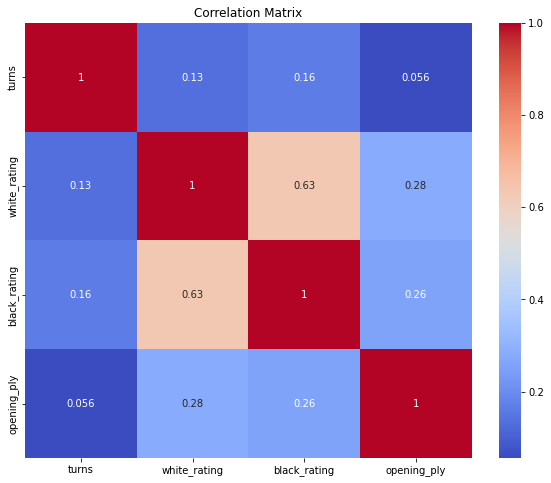

In [10]:
correlation_matrix = data[['turns', 'white_rating', 'black_rating', 'opening_ply']].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

### Rating Difference by Game Outcome
This section calculates the absolute rating difference between white and black players and then visualizes this difference based on the game outcome using a boxplot. The x-axis represents the game winner, while the y-axis shows the rating difference between players.

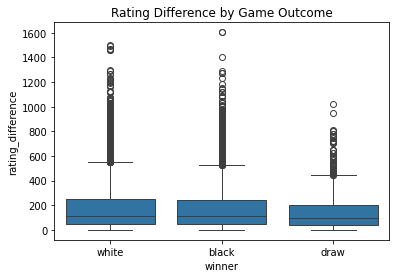

In [11]:
data['rating_difference'] = abs(data['white_rating'] - data['black_rating'])

sns.boxplot(x='winner', y='rating_difference', data=data)
plt.title('Rating Difference by Game Outcome')
plt.show()

### Average Rating Difference by Game Winner
This section calculates the average rating difference between white and black players for each game winner category. It then visualizes these average rating differences using a bar plot, with different colors representing different game winners.  As we can see, it is a close balance between rating difference and color.

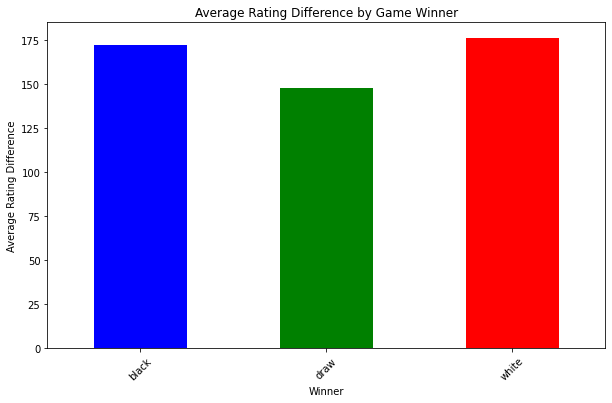

In [13]:
avg_rating_diff_by_winner = data.groupby('winner')['rating_difference'].mean()

plt.figure(figsize=(10, 6))
avg_rating_diff_by_winner.plot(kind='bar', color=['blue', 'green', 'red'])
plt.title('Average Rating Difference by Game Winner')
plt.xlabel('Winner')
plt.ylabel('Average Rating Difference')
plt.xticks(rotation=45)
plt.show()

### Average Rating Difference by Game Winner
This section calculates the average rating difference between white and black players for each game winner category. It then visualizes these average rating differences using a bar plot, with different colors representing different game winners.  As we can see, the majority of rating differences in games is pretty low, < 100 rating points.  This means most games are with evenly matched players.

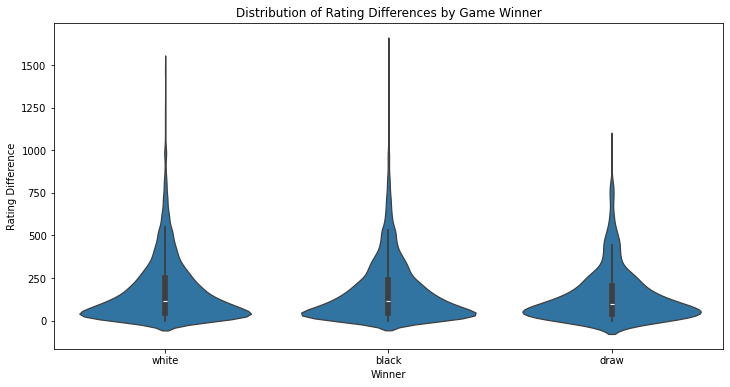

In [14]:
# Explore the distribution of rating differences for different outcomes
plt.figure(figsize=(12, 6))
sns.violinplot(x='winner', y='rating_difference', data=data)
plt.title('Distribution of Rating Differences by Game Winner')
plt.xlabel('Winner')
plt.ylabel('Rating Difference')
plt.show()

### Top 10 Openings by Average Player Rating
This section calculates the average ratings of white and black players for each opening name, sorts them based on the average white player rating in descending order, and selects the top 10 openings. It then visualizes these top 10 openings based on the average white player rating using a bar plot.

As we can see, there is not much of a trend here, and therefore this will be excluded from the model.  Potentially, this would've been useful as advanced players/cheating players would use more advanced openings, but as many skilled players use common openings, there is not much of a trend.

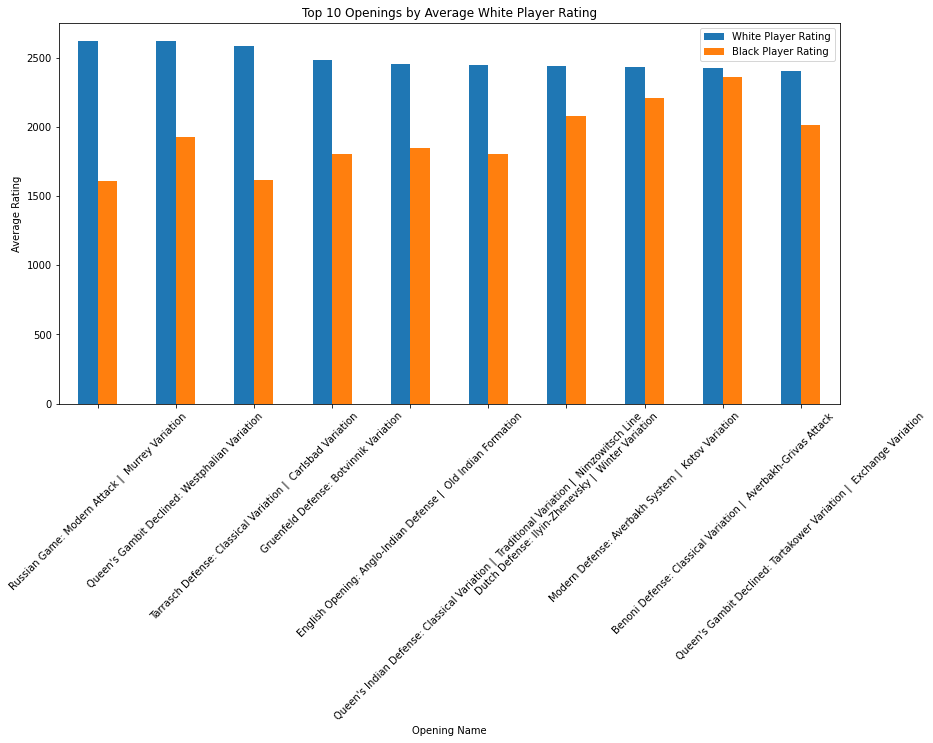

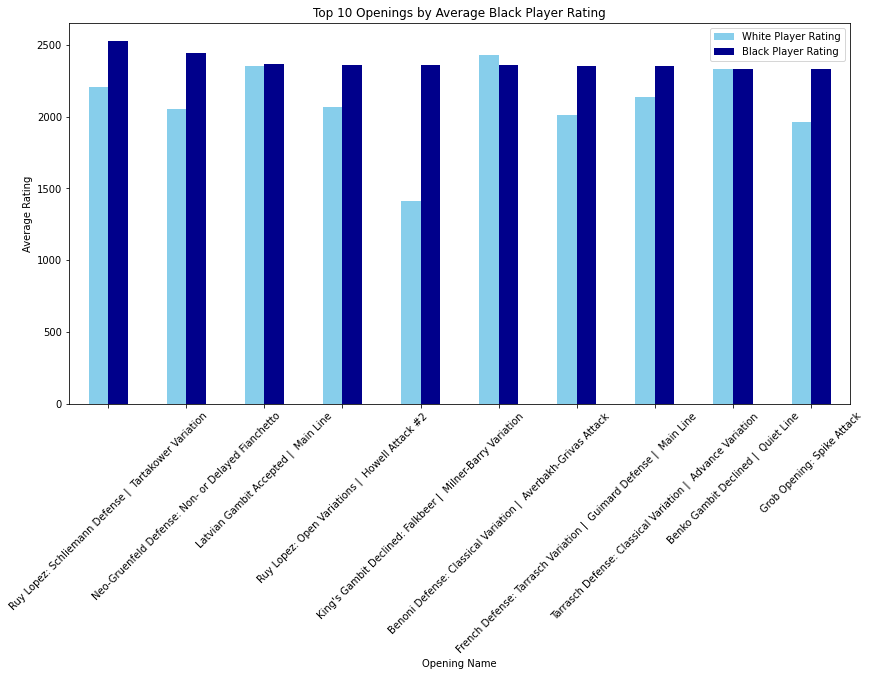

,white_rating,black_rating
opening_name,,
Russian Game: Modern Attack | Murrey Variation,2621.000000,1613.0
Queen's Gambit Declined: Westphalian Variation,2619.000000,1927.0
Tarrasch Defense: Classical Variation | Carlsbad Variation,2586.000000,1618.0
Gruenfeld Defense: Botvinnik Variation,2485.000000,1802.0
English Opening: Anglo-Indian Defense | Old Indian Formation,2454.000000,1848.0
Queen's Indian Defense: Classical Variation | Traditional Variation | Nimzowitsch Line,2452.000000,1802.0
Dutch Defense: Ilyin-Zhenevsky | Winter Variation,2440.000000,2081.0
Modern Defense: Averbakh System | Kotov Variation,2432.000000,2213.0
Benoni Defense: Classical Variation | Averbakh-Grivas Attack,2428.000000,2360.0


In [15]:
avg_ratings_by_opening = data.groupby('opening_name').agg({
    'white_rating': 'mean',
    'black_rating': 'mean'
}).sort_values(by='white_rating', ascending=False)

top_openings_white = avg_ratings_by_opening.head(10)
top_openings_white.plot(kind='bar', figsize=(14, 7))
plt.title('Top 10 Openings by Average White Player Rating')
plt.xlabel('Opening Name')
plt.ylabel('Average Rating')
plt.legend(['White Player Rating', 'Black Player Rating'])
plt.xticks(rotation=45)
plt.show()

top_openings_black = avg_ratings_by_opening.sort_values(by='black_rating', ascending=False).head(10)
top_openings_black.plot(kind='bar', figsize=(14, 7), color=['skyblue', 'darkblue'])
plt.title('Top 10 Openings by Average Black Player Rating')
plt.xlabel('Opening Name')
plt.ylabel('Average Rating')
plt.legend(['White Player Rating', 'Black Player Rating'])
plt.xticks(rotation=45)
plt.show()

avg_ratings_by_opening.head(10)

### Analysis of Winning Against Higher Rated Opponents
This section calculates the win rates of players when they defeat opponents with higher ratings. It creates binary indicators, white_win_against_higher and black_win_against_higher, to identify matches where the winner had a lower rating than their opponent. Then, it computes the mean win rates for white and black players separately.

As we can see, there are many players in this camp.  In the next section, we will also filter by players who played more than 3 games to get a better sample, as many players may have just played one game and won.

In [69]:
data['white_win_against_higher'] = (data['white_rating'] < data['black_rating']) & (data['winner'] == 'white')
data['black_win_against_higher'] = (data['black_rating'] < data['white_rating']) & (data['winner'] == 'black')

white_wins_against_higher = data.groupby('white_id')['white_win_against_higher'].mean()
black_wins_against_higher = data.groupby('black_id')['black_win_against_higher'].mean()

combined_win_rates = pd.concat([white_wins_against_higher, black_wins_against_higher], axis=0).groupby(level=0).mean()

higher_than_win_rates = combined_win_rates.sort_values(ascending=False)
perfect_win_rate = higher_than_win_rates[higher_than_win_rates == 1.0]

print(perfect_win_rate)

djd38                   1.0
flavioleo               1.0
kizes86                 1.0
tonia                   1.0
toni90                  1.0
                       ... 
vladis063               1.0
hamir                   1.0
vladimirsahmat0v        1.0
manuelsobrinhoficial    1.0
liemvodich              1.0
Length: 2051, dtype: float64


### Total Games Played by Player
This section calculates the total number of games played by each player, considering both their appearances as white and black players. It groups the dataset by player ID, counts the number of games played as white and black separately, and then sums these counts to get the total games played.

This is used in the next section for filtering by games played.

In [30]:
games_played_as_white = data.groupby('white_id').size()
games_played_as_black = data.groupby('black_id').size()

total_games_by_player = games_played_as_white.add(games_played_as_black, fill_value=0).astype(int)

total_games_by_player_data = total_games_by_player.reset_index()
total_games_by_player_data.columns = ['player_id', 'total_games_played']

total_games_by_player_data.head(10)

,player_id,total_games_played
0,--jim--,1
1,-0olo0-,1
2,-l-_jedi_knight_-l-,12
3,-mati-,1
4,-pavel-,1
5,1063314,2
6,1111112222,3
7,1240100948,46
8,12ss34,1
9,1714-2014,1


### Filtered Players with Perfect Win Rate
This section filters players who have achieved a perfect win rate against higher-rated opponents and have played a significant number of games, defined by a minimum games threshold of 3. It first selects players who meet the minimum games threshold from the total games by player data. Then, it filters the players with perfect win rates to include only those who have played a significant number of games.

From this, we can see that there are many less players with "perfect" records.

In [45]:
min_games_threshold = 3
players_with_enough_games = total_games_by_player_data[total_games_by_player_data['total_games_played'] >= min_games_threshold]

players_with_perfect_win_rate_data = perfect_win_rate.reset_index()
players_with_perfect_win_rate_data.columns = ['player_id', 'win_rate']

# Filter to include only those players who have played a significant number of games
significant_players_with_perfect_win_rate = players_with_perfect_win_rate_data[players_with_perfect_win_rate_data['player_id'].isin(players_with_enough_games['player_id'])]

significant_players_with_perfect_win_rate.info()
significant_players_with_perfect_win_rate.head(10)

<class 'pandas.core.frame.DataFrame'>
Index: 23 entries, 34 to 1985
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   player_id  23 non-null     object 
 1   win_rate   23 non-null     float64
dtypes: float64(1), object(1)
memory usage: 552.0+ bytes


,player_id,win_rate
34,mucizeci,1.0
72,bob_the_bunny,1.0
139,dinnei,1.0
227,bulletlover,1.0
287,tiaoabdo,1.0
469,ins0mn1a,1.0
538,mr_zilgaze,1.0
617,patolino,1.0
847,oldsim,1.0
874,darkhorse_98,1.0


# Model Architecture and Analysis

### Reconstruction of Features for Model Analysis

In this section, we reconstruct the dataset to extract features relevant for our model analysis.

#### For Players:
- **White Win Rate Against Higher-Rated Opponents**: Calculates the proportion of games won by players when they are rated lower than their opponents.
- **Average Rating Difference in Victories**: Computes the average rating difference between players and their opponents in games won by players.
- **Total Games Played**: Counts the total number of games played by each player.

These reconstructed features aim to provide insights into player performance against higher-rated opponents and overall game participation. This helps to facilitate subsequent model building and analysis.

In [48]:
data['white_win_higher_rated'] = (data['white_rating'] < data['black_rating']) & (data['winner'] == 'white')
white_features = data.groupby('white_id').agg({
    'white_win_higher_rated': 'mean',
    'rating_difference': lambda x: x[data['winner'] == 'white'].mean(),
    'id': 'count'
}).rename(columns={'id': 'white_total_games', 'white_win_higher_rated': 'white_win_rate_higher', 'rating_difference': 'white_avg_rating_diff'})

data['black_win_higher_rated'] = (data['black_rating'] < data['white_rating']) & (data['winner'] == 'black')
black_features = data.groupby('black_id').agg({
    'black_win_higher_rated': 'mean',
    'rating_difference': lambda x: x[data['winner'] == 'black'].mean(),
    'id': 'count'
}).rename(columns={'id': 'black_total_games', 'black_win_higher_rated': 'black_win_rate_higher', 'rating_difference': 'black_avg_rating_diff'})


### Merging and Finalizing Player Features

This section involves merging the reconstructed features for white and black players and deriving additional aggregated features for each player:

1. **Merging Features**: The features for white and black players are merged on a common identifier ('player_id') using an outer join. Missing values resulting from the merge operation are filled with zeros, but this generally should not happen.

2. **Total Win Rate Against Higher-Rated Opponents**: Calculates the overall win rate against higher-rated opponents for each player by combining the win rates from both white and black player features.

3. **Total Games Played**: Computes the total number of games played by each player by summing the games played by both white and black players.

4. **Average Rating Difference**: Derives the average rating difference for each player by combining the average rating differences from both white and black player features.

5. **Final Player Features**: Extracts the final player features, including the player ID, total win rate against higher-rated opponents, total games played, and average rating difference.

These finalized player features serve as input for subsequent modeling and analysis tasks.

In [49]:
white_features.reset_index(inplace=True)
black_features.reset_index(inplace=True)

# Rename 'white_id' and 'black_id' to a common name for merging
white_features.rename(columns={'white_id': 'player_id'}, inplace=True)
black_features.rename(columns={'black_id': 'player_id'}, inplace=True)

all_player_features = pd.merge(white_features, black_features, on='player_id', how='outer').fillna(0)
all_player_features['total_win_rate_higher'] = (all_player_features['white_win_rate_higher'] * all_player_features['white_total_games'] + all_player_features['black_win_rate_higher'] * all_player_features['black_total_games']) / (all_player_features['white_total_games'] + all_player_features['black_total_games'])
all_player_features['total_games'] = all_player_features['white_total_games'] + all_player_features['black_total_games']
all_player_features['avg_rating_diff'] = (all_player_features['white_avg_rating_diff'] * all_player_features['white_total_games'] + all_player_features['black_avg_rating_diff'] * all_player_features['black_total_games']) / (all_player_features['white_total_games'] + all_player_features['black_total_games'])

final_player_features = all_player_features[['player_id', 'total_win_rate_higher', 'total_games', 'avg_rating_diff']]

### Aggregating Player Features

In this section, player features are aggregated to provide a comprehensive summary for each player:

- **Total Win Rate Against Higher-Rated Opponents**: Calculates the mean win rate against higher-rated opponents for each player.
- **Average Rating Difference in Wins**: Computes the mean average rating difference in games won by each player.
- **Total Games Played Against Higher-Rated Opponents**: Sums up the total games played against higher-rated opponents by each player.

These aggregated player features encapsulate key performance metrics and participation levels, offering valuable insights for the model.

player_features is the final relevant information that will be used for modeling.

In [54]:
# Calculate win rate against higher-rated opponents and average rating difference for wins
player_features = final_player_features.groupby('player_id').agg({
    'total_win_rate_higher': 'mean',  # Win rate against higher-rated opponents
    'avg_rating_diff': 'mean',  # Average rating difference in wins
    'total_games': 'sum'  # Total games played
}).rename(columns={'total_games': 'total_games_against_higher'})

player_features.head(20)

,total_win_rate_higher,avg_rating_diff,total_games_against_higher
player_id,,,
--jim--,0.000000,0.000000,1.0
-0olo0-,0.000000,0.000000,1.0
-l-_jedi_knight_-l-,0.083333,86.125000,12.0
-mati-,0.000000,84.000000,1.0
-pavel-,0.000000,237.000000,1.0
1063314,0.000000,108.000000,2.0
1111112222,0.333333,28.666667,3.0
1240100948,0.173913,104.938735,46.0
12ss34,0.000000,283.000000,1.0


## Building the model
Now it is finally time to build the model.  We will start by normalizing the player_features, and then print out 5 rows just to inspect.

In [68]:
from sklearn.preprocessing import StandardScaler

# Normalize the features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(player_features)

print(features_scaled[:5])

[[-0.48171787 -0.63216764 -0.25991864 -0.63378664]
 [-0.48171787 -0.63216764 -0.25991864 -0.63378664]
 [-0.23977461 -0.04481674  1.56607323  2.33083686]
 [-0.48171787 -0.0593087  -0.25991864 -0.63378664]
 [-0.48171787  0.98411293 -0.25991864  1.58968099]]


## K-Means Clustering
In this section, we employ K-Means clustering to analyze player features and identify patterns within the dataset. Beginning with the initialization of a K-Means model configured to form five clusters, we proceeded to assign each player to a cluster based on their scaled features using the fit_predict method. Subsequently, we integrated the cluster labels back into the original player features DataFrame. This approach allowed us to group players into distinct clusters based on similarities in their performance metrics and participation levels. By assigning cluster labels to players, we aim to uncover underlying structures and relationships within the dataset, facilitating further analysis and interpretation of player groups.

### Why 5 clusters?
I ran the numbers a few times and found this to be best.  3 felt more intuitive, for 'cheaters', skilled players and unskilled players.  However, 3 clusters did not capture the relationship well.  I tried high values like 10 and those also did not capture the values that well, but interestingly did find a lot of similarity in suspicious win-rate players.  I settled on 5 because it represented the data in a way where different types of players were categorized, and potential cheaters were largely singled out.

In [61]:
from sklearn.cluster import KMeans

# Apply K-Means clustering
kmeans = KMeans(n_clusters=5)
clusters = kmeans.fit_predict(features_scaled)

# Add cluster labels back to the original DataFrame
player_features['cluster'] = clusters

player_features.head()

,total_win_rate_higher,avg_rating_diff,total_games_against_higher,cluster
player_id,,,,
--jim--,0.000000,0.000,1.0,0
-0olo0-,0.000000,0.000,1.0,0
-l-_jedi_knight_-l-,0.083333,86.125,12.0,4
-mati-,0.000000,84.000,1.0,0
-pavel-,0.000000,237.000,1.0,3


# Cluster Results
Here, we look at the basic cluster values.  Note that we analyze them below.

In [62]:
cluster_analysis = player_features.groupby('cluster').mean()
cluster_counts = player_features['cluster'].value_counts()

print(cluster_counts)
print(cluster_analysis)

cluster
0    10045
1     2101
3     1907
4     1192
2      390
Name: count, dtype: int64
         total_win_rate_higher  avg_rating_diff  total_games_against_higher
cluster                                                                    
0                     0.000000        27.980767                    1.316476
1                     0.988731       107.587822                    1.171347
2                     0.160349       154.446956                   35.756410
3                     0.025383       399.685549                    1.771369
4                     0.340512       100.476536                    5.963087


### PCA Decomponsition and Examination
In this section, we applied Principal Component Analysis (PCA) to reduce the dimensionality of the scaled player features for visualization purposes. By reducing the feature space to two dimensions, we aimed to represent the player clusters in a scatter plot. The pca object was instantiated with two principal components to capture the maximum variance in the data. Subsequently, the fit_transform method was utilized to transform the scaled features into the reduced feature space. The resulting reduced_features array contains the transformed data points.

Next, we plotted the player clusters on a 2D scatter plot. Each data point represents a player, with its position determined by the values of the first and second principal components. The clusters are differentiated by color, allowing for visual identification of player groups. The scatter plot provides insights into the distribution and separation of player clusters based on their performance against higher-rated opponents. The title, axes labels, color bar, and other plot aesthetics were configured to enhance interpretability. Let's examine the resulting scatter plot to gain visual insights into the player clusters.

### Examination
We can see some clear outliers, who are either extremely good at chess or cheaters.  The latter is more likely.  Note the clump of players around the coordinates (7.5, 7.5).  These individuals, and the player at (15.0, 15.0) are suspicious players.

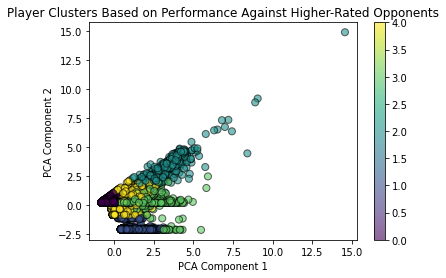

In [63]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Reduce the dimensions for visualization
pca = PCA(n_components=2)
reduced_features = pca.fit_transform(features_scaled)

# Plot the clusters
plt.scatter(reduced_features[:, 0], reduced_features[:, 1], c=clusters, cmap='viridis', marker='o', edgecolor='k', s=50, alpha=0.6)
plt.title('Player Clusters Based on Performance Against Higher-Rated Opponents')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar()
plt.show()

## Count of Players in Each Cluster
As we can see, this is a chart of players in each cluster.  The majority of players are in cluster 0.  See the discussion section for more analysis on clusters.

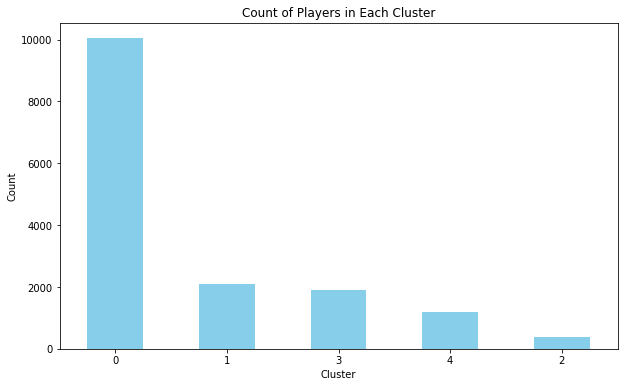

In [67]:
plt.figure(figsize=(10, 6))
cluster_counts.plot(kind='bar', color='skyblue')
plt.title('Count of Players in Each Cluster')
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

# Discussion/Conclusion

## Unpacking the Clusters
### Cluster 0: Occasional and Average Chess Players
The cluster analysis reveals interesting insights into the player distribution across different clusters based on their performance metrics. Cluster 0 stands out as the largest cluster with 10,045 players, characterized by a relatively low total win rate against higher-rated opponents (0.00), indicating these players might struggle against tougher competition.  They may also be partially made up of bots or novice players who are still not accurately ranked.  However, they exhibit a moderate average rating difference (27.98), suggesting they often compete with opponents of similar skill levels.  They are probably in the range of "most" players.

### Cluster 1: Potential Cheaters and Underestimated Masters
In contrast, Cluster 1 comprises 2,101 players who demonstrate a remarkably high total win rate against higher-rated opponents (0.99), coupled with a significantly higher average rating difference (107.59), indicating their proficiency in defeating stronger adversaries.  With the rate being extremely high, however, these are likely our cheaters.  Cluster 1 is likely not entirely comprised of cheaters.  Some players in this category, for example, could be new to the website but experience in chess, so they potentially are "underranked".  They could also simply be players that improved at a fast rate.  All that said, this cluster's players are suspect to cheating, due to their impressive win rate against higher ranked players.

### Cluster 2: Frequent Players and Correctly Ranked
Cluster 2, with 390 players, shows a moderate total win rate (0.16) and a notably high average rating difference (154.45).  These players are likely frequent players who are slowly getting better.

### Cluster 3: New Players and Lucky Players
Cluster 3 consists of 1,907 players exhibiting a very low total win rate (0.03) and the highest average rating difference (399.69).  Nearly 400 points of rating is a massive difference in skill, and given the very low win rate, these players might just be getting lucky.  They could be winning via conditions such as time, where the better player simply forgot to play.

## Did this Algorithm Find Cheaters?
This algorithm seemed to work very well.  The dataset did not contain any truth values as to if players were cheaters or not, so it cannot be said for certain, but players who are almost always winning against opponents ranked higher than them is suspect.  No one wins every game they play, especially against better opponents, so Cluster 1 likely contains many of the cheaters.

## Room for Improvement
After analysis, I realized in the data for training, I did not filter out the players who played few games.  This skewed the data, and potentially skewed cluster 1 significantly.  I think cluster 1 still contains cheaters, particularly the clump around (7.5, 7.5) in the Principle Component Analysis, but I think cluster 1 should be significantly smaller.

## In Summary
All things considered, this was a pretty well performing model that seems to at least cluster players in ways where the vast majority of players can be confirmed honest players, and a subsect can appear as suspicious players.

# References

J, M. (2023, March 2). https://www.kaggle.com/datasets/datasnaek/chess. 